In [1]:
import arxivscraper
import re
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:

Q1 = {
    'start': date(day=1, month=1, year=2020),
    'end': date(day=31, month=3, year=2020)
}
Q2 = {
    'start': date(day=1, month=4, year=2020),
    'end': date(day=30, month=6, year=2020)
}
Q3 = {
    'start': date(day=1, month=7, year=2020),
    'end': date(day=30, month=9, year=2020)
}

In [3]:
q1_papers = dict()
q2_papers = dict()
q3_papers = dict()

In [4]:
scraper = arxivscraper.Scraper(category='cs', date_from='2020-01-01',date_until='2020-03-31', filters={'categories':['cs.ai', 'cs.cv', 'cs.cl', 'cs.lg', 'cs.ro']})


In [5]:
output = scraper.scrape()

fetching up to  1000 records...
fetching up to  2000 records...
fetching up to  3000 records...
fetching up to  4000 records...
fetching up to  5000 records...
fetching up to  6000 records...
fetching up to  7000 records...
fetching up to  8000 records...
fetching up to  9000 records...
fetching up to  10000 records...
fetching up to  11000 records...
fetching up to  12000 records...
fetching up to  13000 records...
fetching up to  14000 records...
fetching up to  15000 records...
fetching up to  16000 records...
fetching up to  17000 records...
fetching up to  18000 records...
fetching is completed in 181.2 seconds.
Total number of records 10456


In [6]:
scraper = arxivscraper.Scraper(category='cs', date_from='2020-04-01',date_until='2020-06-30', filters={'categories':['cs.ai', 'cs.cv', 'cs.cl', 'cs.lg', 'cs.ro']})


In [7]:
output += scraper.scrape()

fetching up to  1000 records...
fetching up to  2000 records...
fetching up to  3000 records...
fetching up to  4000 records...
fetching up to  5000 records...
fetching up to  6000 records...
fetching up to  7000 records...
fetching up to  8000 records...
fetching up to  9000 records...
fetching up to  10000 records...
fetching up to  11000 records...
fetching up to  12000 records...
fetching up to  13000 records...
fetching up to  14000 records...
fetching up to  15000 records...
fetching up to  16000 records...
fetching up to  17000 records...
fetching up to  18000 records...
fetching up to  19000 records...
fetching up to  20000 records...
fetching up to  21000 records...
fetching up to  22000 records...
fetching up to  23000 records...
fetching up to  24000 records...
fetching up to  25000 records...
fetching is completed in 248.2 seconds.
Total number of records 14721


In [8]:
scraper = arxivscraper.Scraper(category='cs', date_from='2020-07-01',date_until='2020-09-30', filters={'categories':['cs.ai', 'cs.cv', 'cs.cl', 'cs.lg', 'cs.ro']})


In [9]:
output += scraper.scrape()

fetching up to  1000 records...
Got 503. Retrying after 30 seconds.
fetching up to  1000 records...
fetching up to  2000 records...
fetching up to  3000 records...
fetching up to  4000 records...
fetching up to  5000 records...
fetching up to  6000 records...
fetching up to  7000 records...
fetching up to  8000 records...
fetching up to  9000 records...
fetching up to  10000 records...
fetching up to  11000 records...
fetching up to  12000 records...
fetching up to  13000 records...
fetching up to  14000 records...
fetching up to  15000 records...
fetching up to  16000 records...
fetching up to  17000 records...
fetching up to  18000 records...
fetching up to  19000 records...
fetching up to  20000 records...
fetching is completed in 226.3 seconds.
Total number of records 11877


In [10]:
for item in output:
    # Parse out the date.
    raw_date = item['created']
    date_match = re.search('\D*(\d+-\d+-\d+).*', raw_date)
    clean_date = date_match.group(1)
    date_obj = datetime.strptime(clean_date, '%Y-%m-%d').date()
    
    # Ignore dates before 2020
    if date_obj < date(year=2020, month=1, day=1):
        continue

    # See which quarter we are in.
    if Q1['start'] <= date_obj <= Q1['end']:
        q1_papers[item['id']] = date_obj
    elif Q2['start'] <= date_obj <= Q2['end']:
        q2_papers[item['id']] = date_obj
    elif Q3['start'] <= date_obj <= Q3['end']:
        q3_papers[item['id']] = date_obj
    else:
        continue


<h3 style="text-align:center;font:cambria">Q1</h3>

<h3 style="text-align:center;font:cambria">Q1</h3>

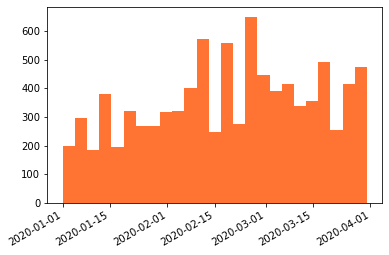

In [16]:
fig, ax = plt.subplots()
ax.hist(q1_papers.values(), bins=25, color='#ff7433')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [21]:
len(q1_papers.values())

9035

In [22]:
len(q2_papers.values())

11776

In [23]:
len(q3_papers.values())

7598

<h3 style="text-align:center;font:cambria">Q2</h3>

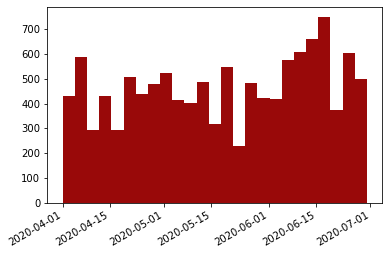

In [18]:
fig, ax = plt.subplots()
ax.hist(q2_papers.values(), bins=25, color='#990909')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

<h3 style="text-align:center;font:cambria">Q3 up to 9/4</h3>

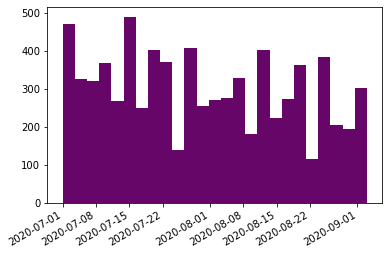

In [19]:
fig, ax = plt.subplots()
ax.hist(q3_papers.values(), bins=25, color='#670669')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

<h1 style="text-align:center;font:cambria">2020 by quarter</h1>

<h4 style="text-align:center;font:cambria">Summary of results.</h4>
<table>
    <tr><th></th><th>Q1</th><th>Q2</th><th>Q3</th></tr>
    <tr><th>My value</th><td>9035</td><td>11776</td><td>7598</td></tr>
    <tr><th>CSET Value</th><td>9204</td><td>11979</td><td>N/A</td></tr>
    <tr><th>Error</th><td>-169</td><td>-203</td><td>N/A</td></tr>
    <tr><th>% Error</th><td>-1.84%</td><td>-1.69%</td><td>N/A</td></tr>

In [29]:
(9035 - 9204) / 9204

-0.018361581920903956

In [30]:
(11776 - 11979) / 11979

-0.016946322731446698